In [2]:
# importing libraries

import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

## Importing Data 

In [4]:
credit_cons_data = pd.read_excel(r"E:\11. Capstone Case Study - Predict Cred Card Consumption\CreditConsumptionData.xlsx")
cust_behav_data = pd.read_excel(r"E:\11. Capstone Case Study - Predict Cred Card Consumption\CustomerBehaviorData.xlsx")
cust_demographic = pd.read_excel(r"E:\11. Capstone Case Study - Predict Cred Card Consumption\CustomerDemographics.xlsx")

## Merging Data

In [5]:
df = pd.merge(credit_cons_data,cust_behav_data,on = 'ID',how  = 'inner')
final_df = pd.merge(df,cust_demographic,on = 'ID',how  = 'inner')
final_df.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

## Separating data on the basis of missing and non missing values for credit card consumption

In [7]:
credit_spend = final_df[final_df.cc_cons.isnull()==0]
credit_spend_new = final_df[final_df.cc_cons.isnull()==1]

## Data Cleaning

## Checking for null values

In [8]:
credit_spend.isnull().sum()

ID                              0
cc_cons                         0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    2
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 1
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_

## Dropping variables

In [9]:
# dropping columns with all unique values because of no use

credit_spend.drop(columns = ['ID'],axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
credit_spend.head()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [12]:
credit_spend.select_dtypes(include='object').columns

Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')

## Converting Categorical Columns to Numerical

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# beacuse we have same entity for loan_enq all along the dataset thats why we are droping that column

credit_spend.drop(columns = ['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed',],axis=1,inplace=True)


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
for c in ['account_type', 'gender', 'Income']:
    print(c,' ',credit_spend[c].nunique())


account_type   2
gender   2
Income   3


In [16]:
for c in ['account_type', 'gender', 'Income']:
    le = LabelEncoder()
    credit_spend[c] = le.fit_transform(credit_spend[c])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19380/2917689464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend[c] = le.fit_transform(credit_spend[c])


In [17]:
le.classes_

array(['HIGH', 'LOW', 'MEDIUM'], dtype=object)

In [18]:
list(range(0,len(le.classes_)))

[0, 1, 2]

In [19]:
dict(zip(le.classes_,list(range(0,len(le.classes_)))))

{'HIGH': 0, 'LOW': 1, 'MEDIUM': 2}

In [20]:
mapping_dict= {}
for c in ['account_type', 'gender', 'Income']:
    le = LabelEncoder()
    credit_spend[c] = le.fit_transform(credit_spend[c])
    d = dict(zip(le.classes_,list(range(0,len(le.classes_)))))
    mapping_dict.update(d)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19380/1765972712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend[c] = le.fit_transform(credit_spend[c])


In [21]:
mapping_dict

{0: 0, 1: 1, 2: 2}

In [22]:
credit_spend.head(2)

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.00,378.0,10288.0,29664.0,16291.4,11432.0,2.0,26,10,...,1674.09,0,1,35,2,15.0,1,708.0,0,17.0
1,10173.0,18941.62,966.0,20672.0,287.0,4217.0,885.0,1.0,7,13,...,13043.34,0,1,35,0,15.0,6,123.0,0,14.0


## Outlier Detection

In [23]:
credit_spend.iloc[:,0:45].describe()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,14995.000000,14995.000000,14995.000000,1.499500e+04,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,...,1.499500e+04,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,55156.748249,17960.830861,8171.498747,1.633869e+04,7702.797188,12130.345532,7098.205684,41.492631,33.488296,41.496699,...,1.576286e+04,0.151584,0.863021,47.793331,1.560920,15.185028,5.510770,598.410804,0.719507,11.048616
std,97680.466478,25191.316571,14775.132716,2.706498e+04,18988.978011,18491.403327,13253.768400,97.447505,49.547493,47.347292,...,1.179348e+05,0.358629,0.343837,30.636617,0.637366,20.315682,2.865848,220.071350,0.449255,5.492216
min,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,25.000000,0.000000,0.500000,1.000000,123.000000,0.000000,2.000000
25%,6768.000000,4411.590000,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.000000,5.000000,8.000000,10.000000,...,1.549350e+03,0.000000,1.000000,33.000000,1.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,13363.000000,10288.100000,3994.800000,8.694000e+03,3821.000000,6655.250000,3327.000000,10.000000,23.000000,35.000000,...,3.953580e+03,0.000000,1.000000,40.000000,2.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,20103.000000,21407.625000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,...,9.376390e+03,0.000000,1.000000,53.000000,2.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,408382.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,...,7.447125e+06,1.000000,1.000000,223.000000,2.000000,203.000000,10.000000,974.000000,1.000000,20.000000


In [24]:
credit_spend.shape

(14995, 43)

<AxesSubplot:>

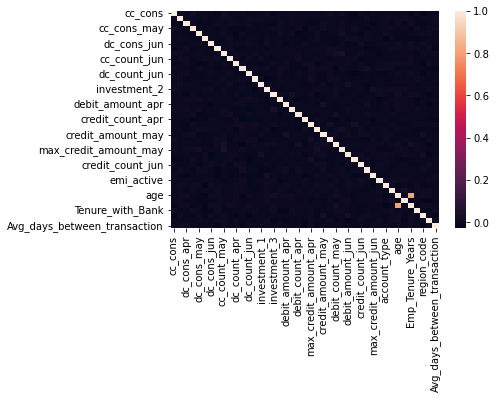

In [25]:
sns.heatmap(credit_spend.corr())

In [27]:
credit_spend=  credit_spend.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
credit_spend

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.00,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26.0,10.0,...,1674.09,0,1,35.0,2,15.0,1,708.0,0,17.0
1,10173.0,18941.62,966.00,20672.00,287.00,4217.000,885.00,1.0,7.0,13.0,...,13043.34,0,1,35.0,0,15.0,6,233.0,0,14.0
2,16095.0,5678.87,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32.0,102.0,...,25375.27,0,1,55.0,2,24.5,1,802.0,1,3.0
3,7707.0,30489.50,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1.0,50.0,...,3544.33,0,0,29.0,2,4.5,6,867.0,1,4.0
5,130263.0,2328.22,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7.0,59.0,...,5026.50,0,1,27.0,2,4.9,3,958.0,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4263.0,10443.76,1218.85,7252.24,3873.00,6633.000,10107.00,3.0,36.0,3.0,...,78966.76,0,0,53.0,1,13.2,9,653.0,1,20.0
14996,11019.0,29890.33,6308.00,16025.50,7610.00,2213.080,841.60,1.0,34.0,4.0,...,4762.10,0,1,44.0,2,2.4,9,535.0,1,2.0
14997,395293.3,4148.98,948.74,19360.26,494.00,44363.910,1801.77,57.0,23.0,61.0,...,2877.33,0,1,37.0,2,3.4,9,464.0,1,8.0
14998,28813.0,115574.00,7191.05,44341.13,34817.20,20679.000,1010.00,7.0,128.0,44.0,...,13006.84,0,1,220.0,2,40.0,10,536.0,1,3.0


In [29]:
credit_spend.describe()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.00000,14995.000000,14995.000000,14995.000000,...,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,55090.050483,17403.889392,7666.858358,15708.711913,7139.962732,11631.691861,6766.60356,41.492631,31.185595,39.804001,...,10238.248959,0.151584,0.863021,47.800067,1.560920,14.734832,5.510770,599.086029,0.719507,11.048616
std,97439.022367,21125.855179,10505.294699,20508.242323,10141.529297,14495.716101,10449.71762,97.447505,30.415583,32.333545,...,21876.590212,0.358629,0.343837,30.584298,0.637366,17.034344,2.865848,218.671378,0.449255,5.492216
min,271.940000,658.551400,153.140000,508.880000,156.706000,334.000000,188.50000,1.000000,1.000000,1.000000,...,26.669600,0.000000,0.000000,27.000000,0.000000,0.900000,1.000000,233.000000,0.000000,2.000000
25%,6768.000000,4411.590000,1634.000000,3638.000000,1643.500000,3004.500000,1358.00000,5.000000,8.000000,10.000000,...,1549.350000,0.000000,1.000000,33.000000,1.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,13363.000000,10288.100000,3994.800000,8694.000000,3821.000000,6655.250000,3327.00000,10.000000,23.000000,35.000000,...,3953.580000,0.000000,1.000000,40.000000,2.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,20103.000000,21407.625000,9339.020000,18951.300000,8212.000000,14247.000000,7597.00000,44.000000,43.000000,61.000000,...,9376.390000,0.000000,1.000000,53.000000,2.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,395293.300000,123825.340000,64804.000000,126472.214000,64794.240000,86965.225000,71638.00000,531.000000,128.000000,135.000000,...,157951.880000,1.000000,1.000000,222.000000,2.000000,121.200000,10.000000,968.000000,1.000000,20.000000


## standardizing data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
x = credit_spend.iloc[:,1:]
y = credit_spend.iloc[:,0]

In [32]:
ss = StandardScaler()
x_fit = ss.fit_transform(x)
x_fit = pd.DataFrame(x_fit)
x_fit.shape

(14995, 42)

## Spliting tha data into train and test 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x_fit,y,test_size = 0.20,random_state= 87)

In [35]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((11996, 42), (2999, 42), (11996,), (2999,))

## Building a ML modelfor prediction

### Decision Tree Regressor 

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt1 = DecisionTreeRegressor(max_depth = 3)
dt1.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3)

In [38]:
pred1 = dt1.predict(xtest)
pred1[:4]

array([45852.65241564, 59137.91622842, 48905.59936466, 70459.33941712])

In [39]:
df2 = pd.DataFrame({'Real_values':ytest,'Predicted_values':pred1})
df2

,Real_values,Predicted_values
7013,9231.0,45852.652416
2895,15484.0,59137.916228
425,4679.0,48905.599365
8723,1341.0,70459.339417
5874,327181.0,70459.339417
...,...,...
3071,16874.0,59137.916228
13259,7066.0,48905.599365
14337,318734.0,53539.399143
9679,10582.0,45852.652416


In [42]:
errors1 = abs((ytest - pred1)/ytest)
print('Mean Absolute Percentage Error:', round(np.mean(errors1), 5)) 

Mean Absolute Percentage Error: 10.27739


In [43]:
rmspe = np.sqrt(np.mean(np.square(((ytest - pred1) / ytest)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe)

Root Mean Squared Percentage Error (RMSPE):: 27.874625606626925


In [44]:
mape = 100*(errors1/ytest)

In [45]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.57 %.


### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor(n_estimators = 80)
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=80)

In [48]:
pred2 = rf.predict(xtest)
pred2[:4]

array([77921.65   , 96700.76625, 87010.53625, 78141.39925])

In [49]:
rf = pd.DataFrame({'Real_values':ytest,'Predicted_values':pred2})
rf

,Real_values,Predicted_values
7013,9231.0,77921.65000
2895,15484.0,96700.76625
425,4679.0,87010.53625
8723,1341.0,78141.39925
5874,327181.0,59954.32000
...,...,...
3071,16874.0,62857.73675
13259,7066.0,51724.46175
14337,318734.0,53596.55100
9679,10582.0,50882.17500


In [51]:
errors2 = abs((ytest - pred2)/ytest)
print('Mean Absolute Percentage Error:', round(np.mean(errors2), 5)) 

Mean Absolute Percentage Error: 12.28451


In [52]:
rmspe = np.sqrt(np.mean(np.square(((ytest - pred2) / ytest)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe)

Root Mean Squared Percentage Error (RMSPE):: 35.134929867470014


In [53]:
mape2 = 100*(errors2/ytest)

In [54]:
accuracy = 100 - np.mean(mape2)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.26 %.


#### As we can see from both the above models given, Decision tree regressor is performing better and gives the accuracy of 98.57%,while on the other hand Random forest regressor gives accuracy of 98.35% . so best model for this data is decision tree regressor.

# Testing on new Data set 

### In credit card consumption data we have some missing values in credit card comsumption column so we are going to build a model which predicts cc_cons on the basis of other features. 

In [56]:
credit_spend_new.isnull().sum()

ID                                 0
cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       0
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    0
credit_count_apr                   0
m

In [57]:
credit_spend_new.shape

(5000, 49)

In [58]:
credit_spend_new.drop(['cc_cons','ID'],inplace= True,axis=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
# as we can see here null values are very less in this data so we drop them here

credit_spend.dropna(inplace=True)

In [60]:
# beacuse we have same entity for loan_enq all along the dataset thats why we are droping that column

credit_spend_new.drop(columns = ['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed',],axis=1,inplace=True)


## Coverting categorical columns to numerical

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
for c in ['account_type', 'gender', 'Income']:
    print(c,' ',credit_spend_new[c].nunique())

account_type   2
gender   2
Income   3


In [63]:
for c in ['account_type', 'gender', 'Income']:
    le = LabelEncoder()
    credit_spend_new[c] = le.fit_transform(credit_spend_new[c])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19380/2789061993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_new[c] = le.fit_transform(credit_spend_new[c])


In [64]:
mapping_dict= {}
for c in ['account_type', 'gender', 'Income']:
    le = LabelEncoder()
    credit_spend_new[c] = le.fit_transform(credit_spend_new[c])
    d = dict(zip(le.classes_,list(range(0,len(le.classes_)))))
    mapping_dict.update(d)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19380/2071870467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_new[c] = le.fit_transform(credit_spend_new[c])


In [65]:
mapping_dict

{0: 0, 1: 1, 2: 2, 3: 3}

In [66]:
credit_spend_new.head(2)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.45,1290.0,6141.05,676.50,9146.1,15479.0,4.0,10,4,47,...,1170.49,0,1,37,2,11.9,4,575.0,1,16.0
15001,29405.13,1640.0,1670.00,2463.92,10947.5,956.0,3.0,10,4,50,...,16447.45,0,1,33,2,7.8,6,394.0,0,19.0


## Missing value imputation

In [67]:
credit_spend_new.isnull().sum()

cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     1
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     1
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_may                 0
max_credit_amount_may           0
debit_amount_jun                0
credit_amount_jun               0
credit_count_j

In [68]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

In [69]:
credit_spend_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15000 to 19999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   5000 non-null   float64
 1   dc_cons_apr                   5000 non-null   float64
 2   cc_cons_may                   4999 non-null   float64
 3   dc_cons_may                   5000 non-null   float64
 4   cc_cons_jun                   5000 non-null   float64
 5   dc_cons_jun                   4999 non-null   float64
 6   cc_count_apr                  5000 non-null   float64
 7   cc_count_may                  5000 non-null   int64  
 8   cc_count_jun                  5000 non-null   int64  
 9   dc_count_apr                  5000 non-null   int64  
 10  dc_count_may                  5000 non-null   int64  
 11  dc_count_jun                  5000 non-null   int64  
 12  card_lim                      5000 non-null   int64  
 13

In [70]:
credit_spend_new = credit_spend_new.apply(missing_imputation)
credit_spend_new

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,1170.49,0,1,37,2,11.9,4,575.0,1,16.000000
15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,16447.45,0,1,33,2,7.8,6,394.0,0,19.000000
15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,2622.28,0,1,53,1,33.0,10,324.0,1,15.000000
15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,340.79,0,1,33,2,7.8,5,370.0,1,7.000000
15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,2812.20,0,1,62,1,12.6,9,505.0,1,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,7870.88,0,1,35,2,13.5,1,523.0,0,7.000000
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,3668.30,0,1,53,2,9.9,7,723.0,1,2.000000
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,5450.34,0,1,62,0,37.8,8,863.0,1,16.000000
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,...,59.29,0,1,34,2,12.6,4,882.0,0,13.000000


# Making prediction on new datasets

In [71]:
rf = RandomForestRegressor(n_estimators = 80)
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=80)

In [72]:
credit_spend_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15000 to 19999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   5000 non-null   float64
 1   dc_cons_apr                   5000 non-null   float64
 2   cc_cons_may                   5000 non-null   float64
 3   dc_cons_may                   5000 non-null   float64
 4   cc_cons_jun                   5000 non-null   float64
 5   dc_cons_jun                   5000 non-null   float64
 6   cc_count_apr                  5000 non-null   float64
 7   cc_count_may                  5000 non-null   int64  
 8   cc_count_jun                  5000 non-null   int64  
 9   dc_count_apr                  5000 non-null   int64  
 10  dc_count_may                  5000 non-null   int64  
 11  dc_count_jun                  5000 non-null   int64  
 12  card_lim                      5000 non-null   int64  
 13

In [73]:
# Assuming rf is a trained RandomForestRegressor
# Assuming 'credit_spend_new' is a DataFrame containing new data

pred_new_cc_cons = rf.predict(credit_spend_new)


In [74]:
pred_new_cc_cons=pd.DataFrame(pred_new_cc_cons.tolist())

In [75]:
pred_new_cc_cons.columns = ['pred_cc_cons']
pred_new_cc_cons

,pred_cc_cons
0,199811.51875
1,213374.65625
2,213374.65625
3,207529.54750
4,211817.61875
...,...
4995,217511.74750
4996,208619.46875
4997,215431.18500
4998,223957.77250


In [76]:
credit_spend_new.reset_index(inplace=True)
credit_spend_new

,index,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,...,1170.49,0,1,37,2,11.9,4,575.0,1,16.000000
1,15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,...,16447.45,0,1,33,2,7.8,6,394.0,0,19.000000
2,15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,...,2622.28,0,1,53,1,33.0,10,324.0,1,15.000000
3,15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,...,340.79,0,1,33,2,7.8,5,370.0,1,7.000000
4,15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,...,2812.20,0,1,62,1,12.6,9,505.0,1,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,7870.88,0,1,35,2,13.5,1,523.0,0,7.000000
4996,19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,3668.30,0,1,53,2,9.9,7,723.0,1,2.000000
4997,19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,5450.34,0,1,62,0,37.8,8,863.0,1,16.000000
4998,19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,59.29,0,1,34,2,12.6,4,882.0,0,13.000000


In [77]:
#Concatenating final prediction with original test file
  
new_data_output = pd.concat([credit_spend_new, pred_new_cc_cons], axis=1)

new_data_output.head()

,index,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,pred_cc_cons
0,15000,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,4,...,0,1,37,2,11.9,4,575.0,1,16.0,199811.51875
1,15001,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,4,...,0,1,33,2,7.8,6,394.0,0,19.0,213374.65625
2,15002,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,5,...,0,1,53,1,33.0,10,324.0,1,15.0,213374.65625
3,15003,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,71,...,0,1,33,2,7.8,5,370.0,1,7.0,207529.54750
4,15004,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,47,...,0,1,62,1,12.6,9,505.0,1,3.0,211817.61875


In [78]:
# That is the final output which we want on our new data sets, the predicted credit_consumption for new 5000 customers